Преобразование Фурье. Амплитудный и фазовый спектр

Задача: найти аргумент и модуль спектральной плотности для последовательности x(nT)={1, 2, 0, 1}

In [481]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

%matplotlib inline

In [482]:
x = np.array([-1, 2, 0, 1, 3, 3, 2, 0])     # Входной сигнал

N = 512     # количество частотных отсчетов

In [483]:
xFFT = fftshift(fft(x, N))      # Вычисление БПФ сигнала x длиной N и сдвиг нулевой частоты в центр

xA = np.abs(xFFT)       # амплитудный спектр
xF = np.angle(xFFT)     # фазовый спектр

# Комплексный спектр
xReal = np.real(xFFT)
xImag = np.imag(xFFT)

xT = [x, xA, xF, np.array([xReal, xImag])]      # Список с исходным сигналом и вычисленными спектрами
title = ['Signal', 'Spectrum', 'Phase', 'Real / Imag']

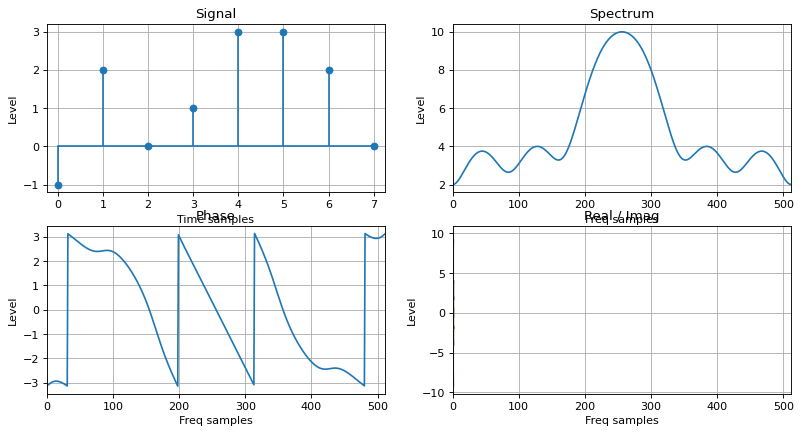

In [484]:
fig = plt.figure(figsize=(12,6), dpi=80)

for i, sig in enumerate(xT):
    plt.subplot(2, 2, i+1)
    plt.ylabel('Level')
    plt.title(title[i])
    
    if i == 0:
        plt.stem(sig, basefmt='C0')
        plt.xlabel('Time samples')
        plt.xlim([-0.25, len(x)-0.75])
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    
    plt.grid()
    
plt.show()

Задача. Вычислить БПФ сигнала прямоугольной формы

In [485]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

%matplotlib inline

In [486]:
N = 1024        # длина сигнала и преобразования Фурье

x = np.zeros(N)
x[64:256] = 1       # создание прямоугольного импульса 

In [487]:
X = fft(x, N)       # Вычисление БПФ сигнала

Xs = fftshift(np.abs(X))        # Вычисление модуля спектра
Xs /= np.max(Xs)            # Нормирование амплитудного спектра

f = np.linspace(-0.5, 0.5, N, endpoint=True)

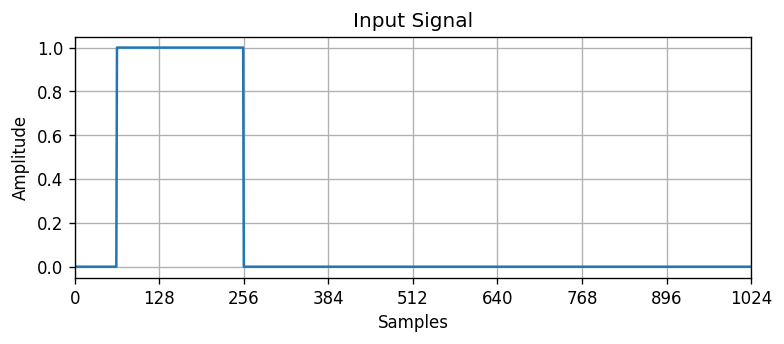

In [488]:
plt.figure(figsize=(16, 12), dpi=120)
plt.subplot(4, 2, 1)
plt.plot(x)

plt.title('Input Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
plt.grid()

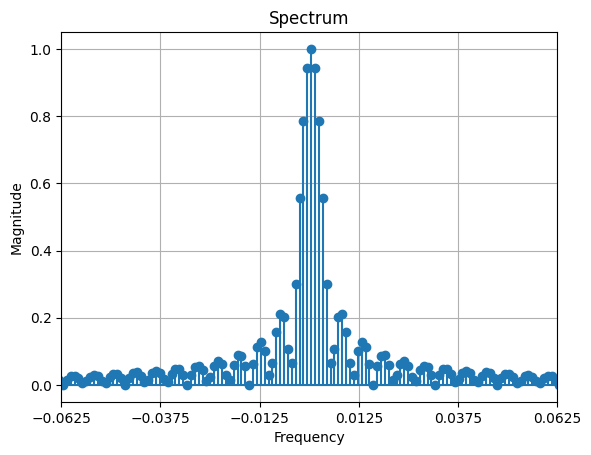

In [489]:
plt.subplot()
plt.stem(f, Xs, basefmt='C0')
plt.title('Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim([-1/16, 1/16])
plt.xticks(np.linspace(-1/16, 1/16, 6, endpoint=True))
plt.grid()

In [490]:
l_freqs = (3, 10, 30, 90, 200, N // 2)      # Количество первых гармоник

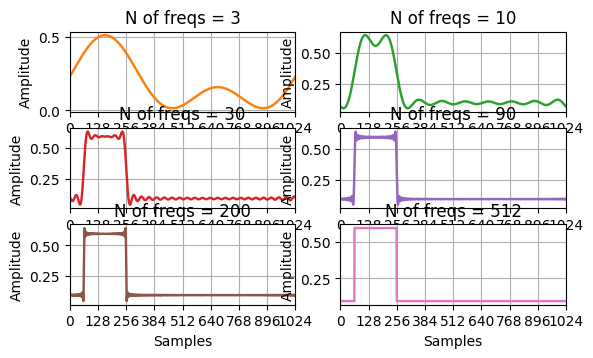

In [491]:
for i, j in enumerate(l_freqs):
    plt.subplot(4, 2, i+3)
    K = X.copy()
    K[j:] = 0       # Оставляем первые j гармоники
    k = np.real(ifft(K))
    
    plt.plot(k, color='C'+str(i+1), linewidth=1.75)
    plt.title(f'N of freqs = {j}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, N-1])
    plt.xticks(np.linspace(0, N, 9, endpoint=True))
    plt.grid()
    
plt.show()

Эффект Гиббса

C:\Users\selimov012\AppData\Local\Temp\ipykernel_8624\889198381.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


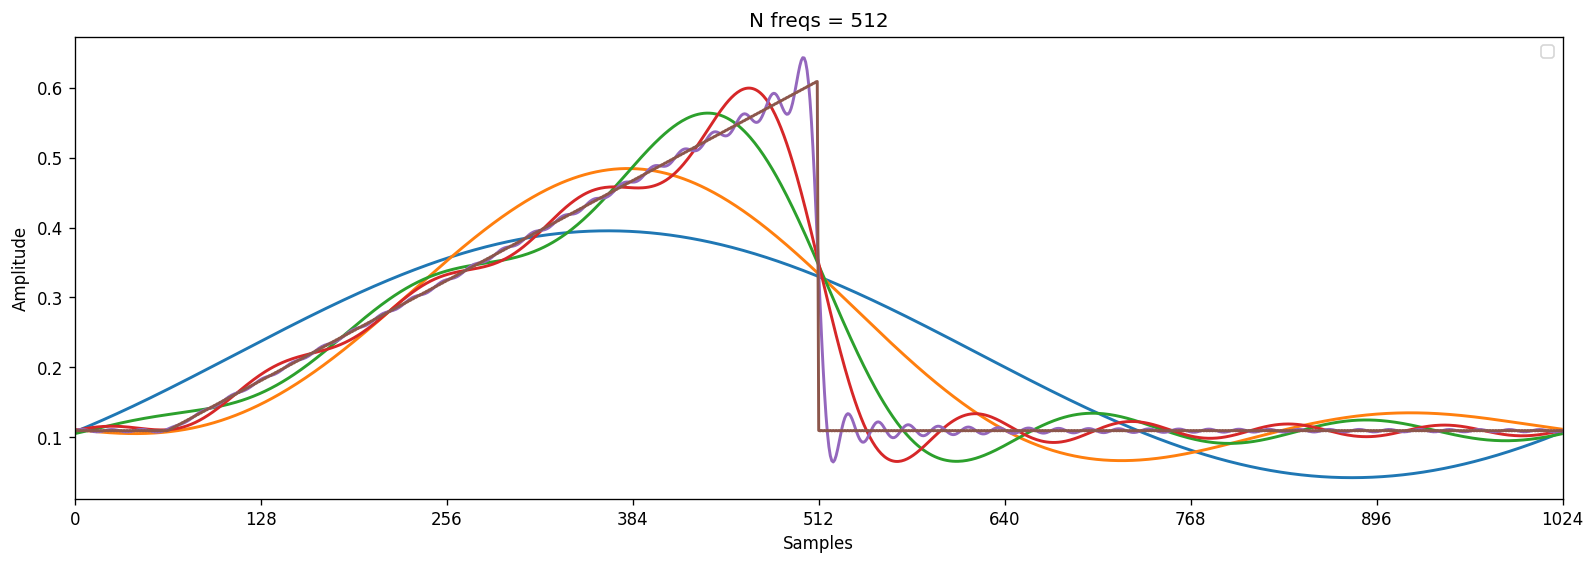

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

%matplotlib inline


N = 1024

x = np.zeros(N)
x[64:512] = np.linspace(0, 1, 512-64) 

X = fft(x, N)

list_freqs = (2, 3, 6, 10, 50, N // 2)      # N // 2 - половина длины БПФ, соответствует частоте Найквиста для вещественного сигнала


plt.figure(figsize=(16, 5), dpi=120)

plt.title('Input Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
plt.grid()


for i, j in enumerate(list_freqs):
    K = X.copy()
    K[j:] = 0 
    k = np.real(ifft(K))
    
    plt.plot(k, color='C'+str(i), linewidth=1.75)
    plt.title('N freqs = {}'.format(list_freqs[i]))
    
plt.grid()
plt.legend()
plt.show()